Snakes

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
trashhauler = pd.read_csv(r"C:\Users\victo\OneDrive\Desktop\Notebooks\Group Projects\trash-haulers-snakes\Data\cleaned_missed_pickups.csv")
trashhauler.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,description_clean,Street Name
0,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,curb/trash miss tuesday.,Clarksville Pike
1,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,curb/trash miss tuesday.,Thunderbird Dr
2,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 Old Matthews Rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,missed,Old Matthews Rd
3,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,missed the even side of the road.,Croley Dr
4,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229,"trash out on time, miss again tuesday. alley",Jo Johnston Ave


In [39]:
trashhauler.columns

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y', 'description_clean',
       'Street Name'],
      dtype='object')

In [41]:
trashhauler.info

<bound method DataFrame.info of        Request Number Date Opened                               Request  \
0               25274  2017-11-01  Trash - Curbside/Alley Missed Pickup   
1               25276  2017-11-01  Trash - Curbside/Alley Missed Pickup   
2               25307  2017-11-01  Trash - Curbside/Alley Missed Pickup   
3               25312  2017-11-01  Trash - Curbside/Alley Missed Pickup   
4               25327  2017-11-01            Trash Collection Complaint   
...               ...         ...                                   ...   
17555          267121  2019-11-01  Trash - Curbside/Alley Missed Pickup   
17556          267125  2019-11-01  Trash - Curbside/Alley Missed Pickup   
17557          267126  2019-11-01  Trash - Curbside/Alley Missed Pickup   
17558          267130  2019-11-01  Trash - Curbside/Alley Missed Pickup   
17559          267137  2019-11-01  Trash - Curbside/Alley Missed Pickup   

                                        Description  \
0           

In [43]:
trashhauler.isnull().sum()

Request Number         0
Date Opened            0
Request                0
Description           29
Incident Address       0
Zip Code              22
Trash Hauler         718
Trash Route          738
Council District      10
State Plan X          24
State Plan Y          24
description_clean     31
Street Name            0
dtype: int64

In [45]:
unique_complaints = trashhauler["Request"].unique()
print(unique_complaints)


['Trash - Curbside/Alley Missed Pickup' 'Trash Collection Complaint'
 'Trash - Backdoor' 'Damage to Property']


In [47]:
top_complaints = trashhauler["Request"].value_counts().head(10)
print(top_complaints)


Request
Trash - Curbside/Alley Missed Pickup    14756
Trash - Backdoor                         2071
Trash Collection Complaint                730
Damage to Property                          3
Name: count, dtype: int64


In [49]:
print(trashhauler["Request"].isnull().sum(), "missing values in 'Request'")

0 missing values in 'Request'


In [56]:
missed_pickups = trashhauler.groupby("Zip Code")["Request"].count().reset_index()
missed_pickups.columns = ["Zip Code", "Total Missed Pickups"]

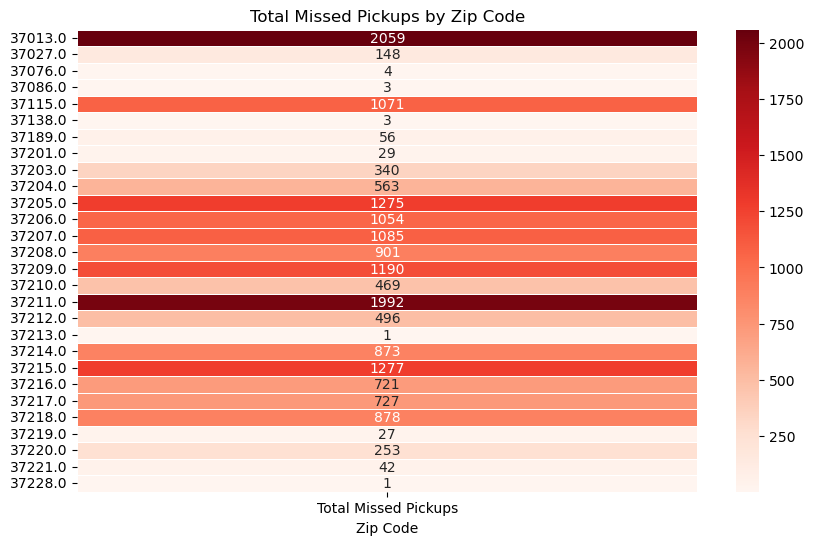

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(missed_pickups.set_index("Zip Code"), cmap="Reds", annot=True, fmt="d", linewidths=0.5)
plt.title("Total Missed Pickups by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("")
plt.show()